In [1]:
import sys,tweepy,csv,re
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
# function to calculate percentage
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [3]:
# authenticating
consumerKey = 'NqXM9g9PUfVc0jonuVrvwGSyB'
consumerSecret = '8jWShAmFeommDDI49yJFVsPWU7nom1Twpc3YTAyfu0zYmgHPf6'
accessToken = '840082255-6sW2HBKFRo4nqIePLGzCmifT0qqGxLufSynfgLic'
accessTokenSecret = 'JgEIelHVAkrTAkt015awLGLoLMb7HD7sPruxlAkQVECc2'


auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [4]:
# input for term to be searched and how many tweets to search
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

Enter Keyword/Tag to search about: datascience
Enter how many tweets to search: 500


In [5]:
# searching for tweets
tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

In [6]:
positive = 0; negative = 0; neutral = 0; polarity = 0

In [7]:
for tweet in tweets:
    #print(tweet.text)
    analysis = TextBlob(tweet.text)
    
    polarity += analysis.sentiment.polarity
    if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (analysis.sentiment.polarity < 0.00):
        negative += 1
    elif (analysis.sentiment.polarity > 0.00):
        positive += 1



In [8]:
# finding average of how people are reacting
positive = percentage(positive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)
polarity = percentage(polarity, NoOfTerms)

#positive = format(positive, '.2f')
positive = format(positive)
negative = format(negative)
neutral = format(neutral)

In [9]:
# printing out data
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")

if(polarity == '0'):
    print("Neutral")
elif(polarity < '0.00'):
    print("Negative")
elif(polarity > '0.00'):
    print("Positive")

How people are reacting on datascience by analyzing 500 tweets.
Positive


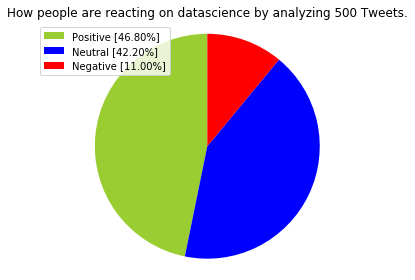

In [10]:
#plotting pie chart
labels = ['Positive [' + str(positive) + '%]', 'Neutral [' + str(neutral) + '%]','Negative [' + str(negative) + '%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue', 'red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90, radius=5)
plt.legend(patches, labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()
